In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score #분류성능평가지도
from sklearn.preprocessing import LabelEncoder #데이터전처리


In [18]:
train = pd.read_csv('./train.csv')
train

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2881 entries, PRODUCT_ID to X_2875
dtypes: float64(2876), int64(1), object(4)
memory usage: 13.1+ MB


In [20]:
train.isnull().sum()

PRODUCT_ID      0
Y_Class         0
Y_Quality       0
TIMESTAMP       0
LINE            0
             ... 
X_2871        499
X_2872        598
X_2873        598
X_2874        598
X_2875        598
Length: 2881, dtype: int64

In [21]:
for i in range(3):
    tmp = train[train['Y_Class']==i].Y_Quality #Y_Quality에 의해서 Y_class 값이 정해짐
    print(f'Class : {i}, Quality range : {min(tmp)} ~ {max(tmp)}')
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n")
print(train.Y_Class.value_counts()) #클래스별 물건개수 파악

train_groupby1=train.groupby(by=['LINE','Y_Class'])['Y_Class'].count()
train_groupby2=train.groupby(by=['PRODUCT_CODE','Y_Class'])['Y_Class'].count() #line별로 yclass 단계를 구분함
#line별로 yclass 단계를 구분함
print(train_groupby1)
print("\n\n")
print(train_groupby2)

Class : 0, Quality range : 0.500855556 ~ 0.525066667
Class : 1, Quality range : 0.525085714 ~ 0.534842857
Class : 2, Quality range : 0.534950794 ~ 0.57884127
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


1    407
2    103
0     88
Name: Y_Class, dtype: int64
LINE     Y_Class
T010305  0           13
         1           35
         2           11
T010306  0            6
         1           37
         2           27
T050304  0           30
         1           37
         2           11
T050307  0           11
         1            9
         2           22
T100304  0           17
         1          144
         2           14
T100306  0           11
         1          145
         2           18
Name: Y_Class, dtype: int64



PRODUCT_CODE  Y_Class
A_31          0           60
              1          118
              2           71
O_31          1            4
              2            2
T_31          0           28
              1          285
              2           30
Name: 

In [22]:
tg1=pd.DataFrame(train_groupby1,columns=['Y_Class'])
tg1

Y_Class
LINE    Y_Class         
T010305 0             13
        1             35
        2             11
T010306 0              6
        1             37
        2             27
T050304 0             30
        1             37
        2             11
T050307 0             11
        1              9
        2             22
T100304 0             17
        1            144
        2             14
T100306 0             11
        1            145
        2             18

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 설정 
import matplotlib
import matplotlib.font_manager as fm
from matplotlib import rc

path = "c:/Windows/Fonts/BRUSHSCI.ttf"
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family=font_name)
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

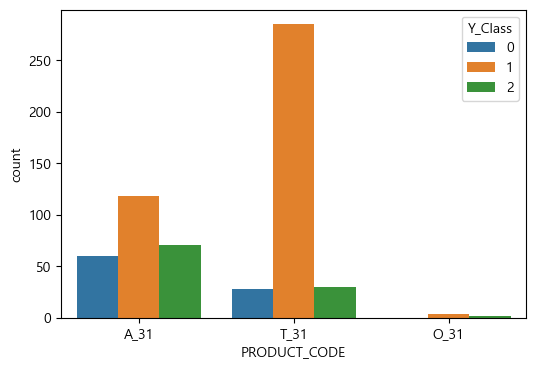

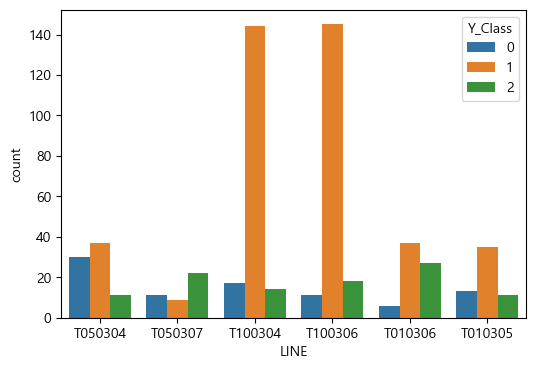

In [24]:
plt.figure(figsize=(6,4))
        
sns.countplot(data=train, x='PRODUCT_CODE', hue='Y_Class')

plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=train, x='LINE', hue='Y_Class')
plt.show() # 데이터들을 학습할때 입력변수가 line과 product_code 이기 때문에 해당 라인과 코드에 얼마나 정상적인 품질을 가지는지 그래프로 
#시각화했다.

- T100304와 T100306이 비교적 정상적인 제품이 많다.
- 제품 코드가 t_31인 상품이 비교적 정상적이다.

In [25]:
train_y=train["Y_Class"]
train_x1=train.drop(["Y_Class","Y_Quality","TIMESTAMP"],axis=1)
train_x1

,PRODUCT_ID,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,T100304,O_31,40.0,94.0,0.0,45.0,11.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
train_x=train_x1.fillna(value=0)#데이터전처리하기위해 null값을 전부 0으로 처리하였다.
train_x


,PRODUCT_ID,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.34,40.89,32.56,34.09,77.77,0.0,0.0,0.0,0.0,0.0
1,TRAIN_001,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.89,42.82,43.92,35.34,72.55,0.0,0.0,0.0,0.0,0.0
2,TRAIN_002,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.19,36.65,42.47,36.53,78.35,0.0,0.0,0.0,0.0,0.0
3,TRAIN_003,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.74,39.17,52.17,30.58,71.78,0.0,0.0,0.0,0.0,0.0
4,TRAIN_004,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.70,41.89,46.93,33.09,76.97,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,50.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
594,TRAIN_594,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.47,53.07,50.89,55.10,66.49,1.0,0.0,0.0,0.0,0.0
595,TRAIN_595,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,1.0,0.0,0.0,0.0,0.0
596,TRAIN_596,T100304,O_31,40.0,94.0,0.0,45.0,11.0,0.0,45.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0


- 변수(product_code,line)에 따라서 Y_Class를 유추해보는 인공지능을 만들것이다. 
- 서로 다른 feature들의 크기를 통일하기위해 사이킷런 StandScaler클래스를 이용해보겠다.(평균0 분산1인 정규분포형태로만들어줌)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [28]:
scaler=StandardScaler() #객체생성
scaler.fit(train_x[train_x.columns[3:]])

train_x_scaled=scaler.transform(train_x[train_x.columns[3:]])
train_x_df_scaled=pd.DataFrame(data=train_x_scaled)
train_x_df_scaled          #스케일링 완료

,0,1,2,3,4,5,6,7,8,9,...,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874
0,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,1.608668,1.574442,1.294833,1.297452,2.671373,-0.445418,0.0,0.0,0.0,0.0
1,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,1.585198,1.669622,1.901036,1.361174,2.462073,-0.445418,0.0,0.0,0.0,0.0
2,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,1.600845,1.365342,1.823660,1.421838,2.694629,-0.445418,0.0,0.0,0.0,0.0
3,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,1.525219,1.489618,2.341280,1.118519,2.431199,-0.445418,0.0,0.0,0.0,0.0
4,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,1.575288,1.623758,2.061658,1.246474,2.639297,-0.445418,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.127626,0.840168,0.0,0.844670,0.766018,0.0,0.885975,0.834377,1.265809,0.844670,...,-0.443122,-0.442094,-0.442664,-0.440386,-0.446886,-0.445418,0.0,0.0,0.0,0.0
594,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,2.137001,2.175113,2.272976,2.368498,2.219091,2.245084,0.0,0.0,0.0,0.0
595,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,-0.443122,-0.442094,-0.442664,-0.440386,-0.446886,2.245084,0.0,0.0,0.0,0.0
596,8.297142,0.818890,0.0,0.844670,0.960697,0.0,0.680110,0.834377,0.309542,0.844670,...,-0.443122,-0.442094,-0.442664,-0.440386,-0.446886,-0.445418,0.0,0.0,0.0,0.0


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
df_clf=RandomForestClassifier(n_estimators=100,random_state=0,max_depth=8)
df_clf.fit(train_x_df_scaled,train_y)



RandomForestClassifier(max_depth=8, random_state=0)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(train_x_df_scaled , train_y)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

rf_clf1 = RandomForestClassifier(n_estimators=100,  min_samples_leaf=6, max_depth=16,
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(train_x_df_scaled , train_y)


최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 2}
최고 예측 정확도: 0.6572


RandomForestClassifier(max_depth=16, min_samples_leaf=6, random_state=0)

 ### 교차검증

In [44]:
train_y


0      1
1      2
2      1
3      2
4      1
      ..
593    1
594    0
595    0
596    1
597    1
Name: Y_Class, Length: 598, dtype: int64

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np


features = train_x_df_scaled
label = train_y
dt_clf_kf = DecisionTreeClassifier(random_state=0)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=10)
cv_accuracy = []
print('데이터세트크기:',features.shape[0])
print('라벨크기:',label.shape[0])

데이터세트크기: 598
라벨크기: 598


In [50]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features): 
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    
    #학습 및 예측 
    dt_clf_kf.fit(X_train , y_train)    
    pred = dt_clf_kf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 

ValueError: Number of labels=538 does not match number of samples=598

In [16]:
rf_clf1 = RandomForestClassifier(n_estimators=100,  min_samples_leaf=12, max_depth=8,
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(train_x_df_scaled ,train_y)

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=train_x_df_scaled.columns)
ftr_importances.sort_values(ascending=False)[:20]

1210    0.013175
120     0.010426
119     0.008418
890     0.007563
1042    0.007395
717     0.007332
917     0.006068
1197    0.006066
1616    0.005835
10      0.005532
1455    0.005430
1965    0.005372
1415    0.004966
527     0.004720
1481    0.004682
1953    0.004678
317     0.004594
2371    0.004541
257     0.004458
1702    0.004364
dtype: float64

In [54]:
train_y

0      1
1      2
2      1
3      2
4      1
      ..
593    1
594    0
595    0
596    1
597    1
Name: Y_Class, Length: 598, dtype: int64

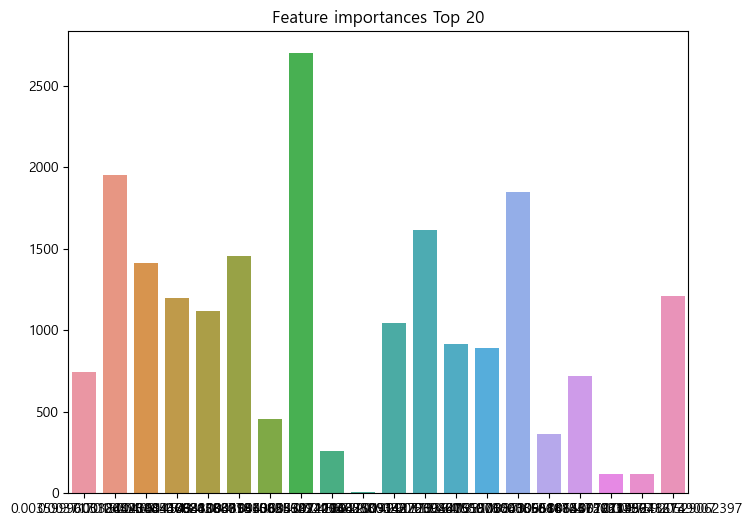

In [40]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=train_x_df_scaled.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

-feature들의 중요도를 볼때 X_1209번이 가장 중요한 영향을 주는 피처이다

In [63]:
subm = pd.read_csv('./sample_submission.csv')
subm.head()
testdata=pd.read_csv('./test.csv')
testdata
testdata1=testdata.fillna(value=0)
testdata1


,PRODUCT_ID,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TEST_000,2022-09-09 2:01,T100306,T_31,2.0,94.0,0.0,45.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TEST_001,2022-09-09 2:09,T100304,T_31,2.0,93.0,0.0,45.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TEST_002,2022-09-09 8:42,T100304,T_31,2.0,95.0,0.0,45.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TEST_003,2022-09-09 10:56,T010305,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TEST_004,2022-09-09 11:04,T010306,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,TEST_305,2022-11-05 11:18,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,TEST_306,2022-11-05 16:39,T100304,T_31,2.0,96.0,0.0,45.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,TEST_307,2022-11-05 16:47,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,TEST_308,2022-11-05 20:53,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:

test_x1=testdata1.drop(["TIMESTAMP","PRODUCT_ID"],axis=1)
test_x1


#pred=rf_clf1.predict(test_X)

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,T100306,T_31,2.0,94.0,0.0,45.0,10.0,0.0,51.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,T100304,T_31,2.0,93.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,T100304,T_31,2.0,95.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,T010305,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,T010306,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,51.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,T100304,T_31,2.0,96.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,50.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,51.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
scalertest=StandardScaler() #객체생성
scalertest.fit(test_x1[test_x1.columns[2:]])

test_x_scaled=scaler.transform(test_x1[test_x1.columns[2:]])
test_x_scaled_finish=pd.DataFrame(data=test_x_scaled)
test_x_scaled_finish          #스케일링 완료

pred=rf_clf1.predict(test_x_scaled_finish)

In [86]:
pred


array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [91]:
pred1=pd.DataFrame(data=pred,columns=["YClass"])
pred1


,YClass
0,1
1,1
2,1
3,1
4,1
...,...
305,1
306,1
307,1
308,1


In [94]:
for i in pred1:
    subm['Y_Class'] = pred1[i]
pred1.value_counts()    

YClass
1         277
0          30
2           3
dtype: int64

In [93]:
subm.to_csv('./sample_submission1.csv', index=False)